In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(4348, 2)

In [3]:
df.head()

,Time,domain
0,2022-01-19 16:05:25,my.umbc.edu
1,2022-01-19 16:05:44,my.umbc.edu
2,2022-01-19 16:05:58,webauth.umbc.edu
3,2022-01-19 16:05:58,webauth.umbc.edu
4,2022-01-19 16:08:35,webauth.umbc.edu


In [4]:
df.tail()

,Time,domain
4343,2022-04-19 20:24:02,localhost:8890
4344,2022-04-19 20:26:24,localhost:8890
4345,2022-04-19 20:38:29,localhost:8890
4346,2022-04-19 20:40:20,localhost:8891
4347,2022-04-19 20:40:24,localhost:8892


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-01-19 16:05:25,my.umbc.edu
1,2022-01-19 16:05:44,my.umbc.edu
2,2022-01-19 16:05:58,webauth.umbc.edu
3,2022-01-19 16:05:58,webauth.umbc.edu
4,2022-01-19 16:08:35,webauth.umbc.edu


In [14]:
df['domain'].value_counts()[:50]

webauth.umbc.edu                                                 1040
blackboard.umbc.edu                                               433
search.yahoo.com                                                  401
my.umbc.edu                                                       274
www.google.co.in                                                  170
umbc-csm.symplicity.com                                           157
mail.google.com                                                   122
scholar.google.com                                                 99
pubmed.ncbi.nlm.nih.gov                                            85
www.amazon.com                                                     75
myretrievercare.umbc.edu                                           64
www.ncbi.nlm.nih.gov                                               53
sci-hub.se                                                         50
isss-portal.umbc.edu                                               46
csprd-web.ps.umbc.ed

<AxesSubplot:>

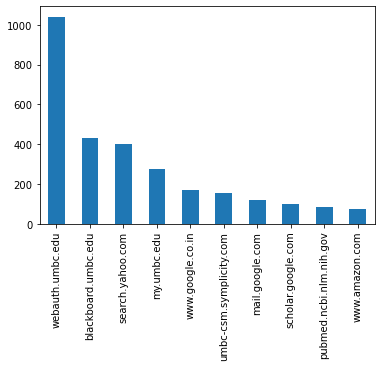

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     148
1      25
2       2
3       9
4       4
6      12
7      86
8     342
9     391
10    272
11    154
12    179
13    158
14    164
15    263
16    214
17    226
18    356
19    250
20    184
21    283
22    387
23    239
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

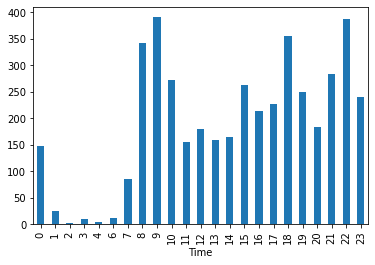

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-01-19 16:05:25,my.umbc.edu,Wednesday,2
1,2022-01-19 16:05:44,my.umbc.edu,Wednesday,2
2,2022-01-19 16:05:58,webauth.umbc.edu,Wednesday,2
3,2022-01-19 16:05:58,webauth.umbc.edu,Wednesday,2
4,2022-01-19 16:08:35,webauth.umbc.edu,Wednesday,2


In [19]:
df['Day'].value_counts()

Sunday       1127
Wednesday     711
Monday        702
Tuesday       597
Saturday      459
Friday        456
Thursday      296
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0     702
1     597
2     711
3     296
4     456
5     459
6    1127
Name: DayIndex, dtype: int64

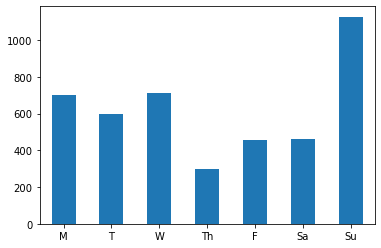

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-01-19 16:05:25,my.umbc.edu,Wednesday,2,False
1,2022-01-19 16:05:44,my.umbc.edu,Wednesday,2,False
2,2022-01-19 16:05:58,webauth.umbc.edu,Wednesday,2,False
3,2022-01-19 16:05:58,webauth.umbc.edu,Wednesday,2,False
4,2022-01-19 16:08:35,webauth.umbc.edu,Wednesday,2,False


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
290,2022-01-22 08:29:16,www.amazon.com,Saturday,5,True
291,2022-01-22 08:29:27,www.amazon.com,Saturday,5,True
292,2022-01-22 08:29:43,www.amazon.com,Saturday,5,True
293,2022-01-22 08:30:01,www.amazon.com,Saturday,5,True
294,2022-01-22 08:30:06,www.amazon.com,Saturday,5,True


In [25]:
weekday['domain'].value_counts()[:5]

webauth.umbc.edu       717
blackboard.umbc.edu    291
my.umbc.edu            213
search.yahoo.com       195
www.google.co.in       132
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

webauth.umbc.edu           323
search.yahoo.com           206
blackboard.umbc.edu        142
my.umbc.edu                 61
pubmed.ncbi.nlm.nih.gov     54
Name: domain, dtype: int64

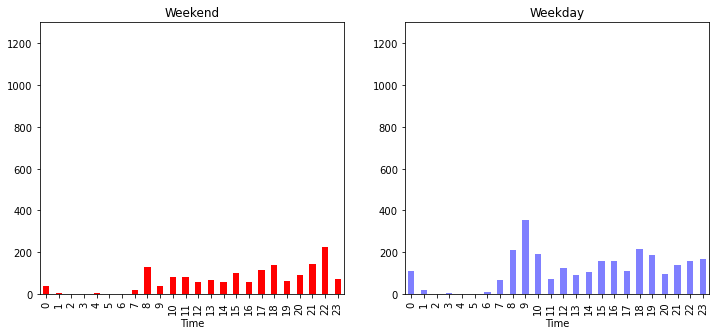

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [28]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

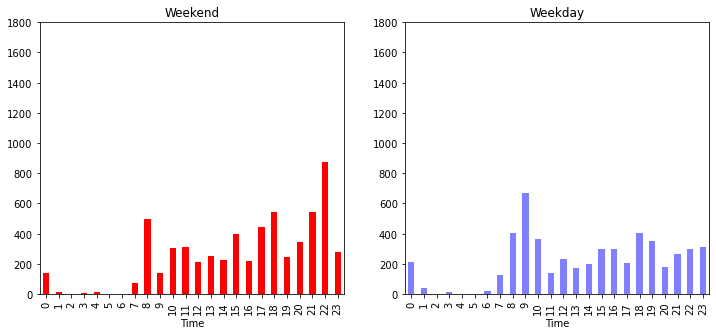

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [30]:
df['domain'].value_counts()[:10]

webauth.umbc.edu           1040
blackboard.umbc.edu         433
search.yahoo.com            401
my.umbc.edu                 274
www.google.co.in            170
umbc-csm.symplicity.com     157
mail.google.com             122
scholar.google.com           99
pubmed.ncbi.nlm.nih.gov      85
www.amazon.com               75
Name: domain, dtype: int64

In [31]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

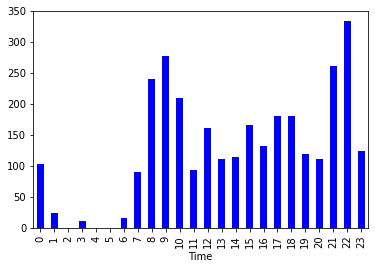

In [40]:
_= show_domain_stats('umbc', 'blue')

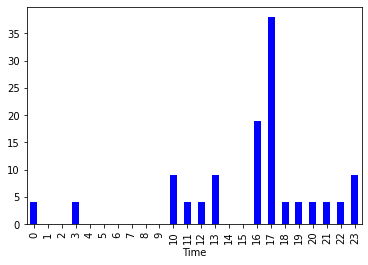

In [34]:
_= show_domain_stats('netflix|youtube|imdb', 'blue')

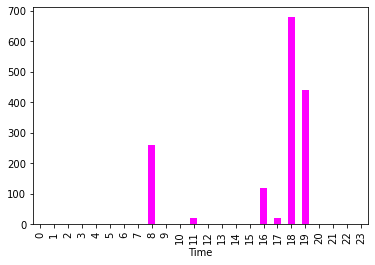

In [41]:
_ = show_domain_stats('amazon', 'magenta')


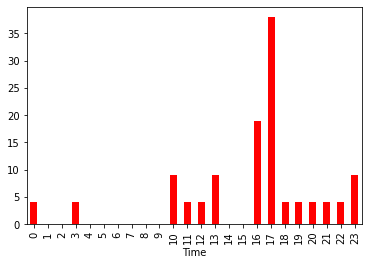

In [42]:
_ = show_domain_stats('youtube', 'red')

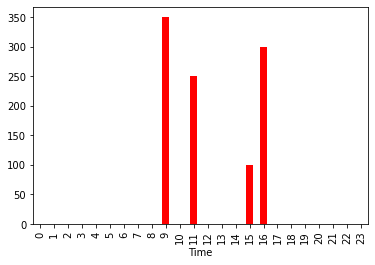

In [45]:
_ = show_domain_stats('zipcar', 'red')

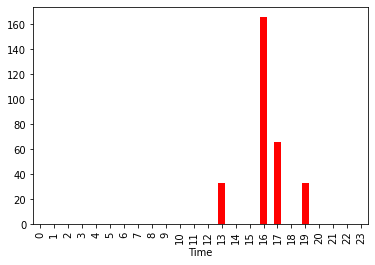

In [38]:
_ = show_domain_stats('netflix|disney|prime', 'red')

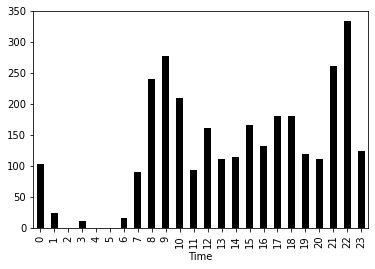

In [39]:
_=show_domain_stats('umbc', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here